# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../src/data/zillow_data.csv')

In [2]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
df.shape

(14723, 272)

# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [5]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [6]:
df = melt_data(df)

In [7]:
df

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,91982,3,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,93144,5,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,58333,14719,2018-04-01,209300.0
3901591,3293,Woodstock,NH,Claremont,Grafton,59107,14720,2018-04-01,225800.0
3901592,40404,Berea,KY,Richmond,Madison,75672,14721,2018-04-01,133400.0
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,93733,14722,2018-04-01,664400.0


In [8]:
df.set_index('time', drop=True, inplace=True)

In [9]:
df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,value
time,,,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,84654,1,334200.0
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,235700.0
1996-04-01,77494,Katy,TX,Houston,Harris,91982,3,210400.0
1996-04-01,60614,Chicago,IL,Chicago,Cook,84616,4,498100.0
1996-04-01,79936,El Paso,TX,El Paso,El Paso,93144,5,77300.0


In [10]:
df['Financial_Crash'] = df.index
df['Financial_Crash'] = df.Financial_Crash.apply(lambda x: x.year)
df['Financial_Crash'] = df.Financial_Crash.apply(lambda x: x >= 2012 )

In [11]:
df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,value,Financial_Crash
time,,,,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,84654,1,334200.0,False
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,235700.0,False
1996-04-01,77494,Katy,TX,Houston,Harris,91982,3,210400.0,False
1996-04-01,60614,Chicago,IL,Chicago,Cook,84616,4,498100.0,False
1996-04-01,79936,El Paso,TX,El Paso,El Paso,93144,5,77300.0,False


In [12]:
df_filtered = df[df['Financial_Crash'] == True]
df_filtered

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,value,Financial_Crash
time,,,,,,,,,
2012-01-01,60657,Chicago,IL,Chicago,Cook,84654,1,737700.0,True
2012-01-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,199600.0,True
2012-01-01,77494,Katy,TX,Houston,Harris,91982,3,248600.0,True
2012-01-01,60614,Chicago,IL,Chicago,Cook,84616,4,928900.0,True
2012-01-01,79936,El Paso,TX,El Paso,El Paso,93144,5,112400.0,True
...,...,...,...,...,...,...,...,...,...
2018-04-01,1338,Ashfield,MA,Greenfield Town,Franklin,58333,14719,209300.0,True
2018-04-01,3293,Woodstock,NH,Claremont,Grafton,59107,14720,225800.0,True
2018-04-01,40404,Berea,KY,Richmond,Madison,75672,14721,133400.0,True


In [184]:
df_filtered.State.unique()

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'ND', 'MN', 'AL',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV',
       'IA', 'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [201]:
for state in df_filtered.State.unique():
    locals()[str(state)] = df_filtered[df_filtered.State == state].groupby('time').aggregate({'value':'mean'}).reset_index()

In [202]:
IL

,time,value
0,2012-01-01,169876.635514
1,2012-02-01,168789.719626
2,2012-03-01,168207.663551
3,2012-04-01,168634.392523
4,2012-05-01,169325.046729
...,...,...
71,2017-12-01,209385.009141
72,2018-01-01,210173.674589
73,2018-02-01,211044.424132
74,2018-03-01,211768.738574


# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
df.head()

In [ ]:
top_zc = df.groupby(['RegionName']).mean().sort_values(['value'], ascending=False)

# Step 5: Modeling

In [13]:
chi_df = df_filtered.loc[df_filtered['RegionName'] == 37115]
chi_df

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,value,Financial_Crash
time,,,,,,,,,
2012-01-01,60657,Chicago,IL,Chicago,Cook,84654,1,737700.0,True
2012-02-01,60657,Chicago,IL,Chicago,Cook,84654,1,733700.0,True
2012-03-01,60657,Chicago,IL,Chicago,Cook,84654,1,734000.0,True
2012-04-01,60657,Chicago,IL,Chicago,Cook,84654,1,740300.0,True
2012-05-01,60657,Chicago,IL,Chicago,Cook,84654,1,744600.0,True
...,...,...,...,...,...,...,...,...,...
2017-12-01,60657,Chicago,IL,Chicago,Cook,84654,1,1018700.0,True
2018-01-01,60657,Chicago,IL,Chicago,Cook,84654,1,1024400.0,True
2018-02-01,60657,Chicago,IL,Chicago,Cook,84654,1,1030700.0,True


In [14]:
# split off 20% of data
eot_index = round(chi_df.shape[0]*0.8)

In [15]:
# creating a df with time as index and value as feature
df_2 = chi_df.value

df_2

time
2012-01-01     737700.0
2012-02-01     733700.0
2012-03-01     734000.0
2012-04-01     740300.0
2012-05-01     744600.0
                ...    
2017-12-01    1018700.0
2018-01-01    1024400.0
2018-02-01    1030700.0
2018-03-01    1033800.0
2018-04-01    1030600.0
Name: value, Length: 76, dtype: float64

In [16]:
# define train, test
train = df_2[:eot_index]
test = df_2[eot_index:]

In [17]:
train

time
2012-01-01    737700.0
2012-02-01    733700.0
2012-03-01    734000.0
2012-04-01    740300.0
2012-05-01    744600.0
                ...   
2016-09-01    980800.0
2016-10-01    988000.0
2016-11-01    994700.0
2016-12-01    998700.0
2017-01-01    997000.0
Name: value, Length: 61, dtype: float64

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.set_title('Train Test Split');

In [19]:
# using a random walk model
random_walk = train.shift(1)

In [20]:
# drop initial na value
random_walk.dropna()

time
2012-02-01    737700.0
2012-03-01    733700.0
2012-04-01    734000.0
2012-05-01    740300.0
2012-06-01    744600.0
2012-07-01    750500.0
2012-08-01    760400.0
2012-09-01    771800.0
2012-10-01    780600.0
2012-11-01    787900.0
2012-12-01    794100.0
2013-01-01    798900.0
2013-02-01    802300.0
2013-03-01    806100.0
2013-04-01    810900.0
2013-05-01    817400.0
2013-06-01    826800.0
2013-07-01    837900.0
2013-08-01    848100.0
2013-09-01    853800.0
2013-10-01    856700.0
2013-11-01    856600.0
2013-12-01    854400.0
2014-01-01    853000.0
2014-02-01    856200.0
2014-03-01    859700.0
2014-04-01    863900.0
2014-05-01    872900.0
2014-06-01    883300.0
2014-07-01    889500.0
2014-08-01    892800.0
2014-09-01    893600.0
2014-10-01    891300.0
2014-11-01    889900.0
2014-12-01    891500.0
2015-01-01    893000.0
2015-02-01    893000.0
2015-03-01    895000.0
2015-04-01    901200.0
2015-05-01    909400.0
2015-06-01    915000.0
2015-07-01    916700.0
2015-08-01    917700.0
2015-0

In [21]:
train[1:]

time
2012-02-01    733700.0
2012-03-01    734000.0
2012-04-01    740300.0
2012-05-01    744600.0
2012-06-01    750500.0
2012-07-01    760400.0
2012-08-01    771800.0
2012-09-01    780600.0
2012-10-01    787900.0
2012-11-01    794100.0
2012-12-01    798900.0
2013-01-01    802300.0
2013-02-01    806100.0
2013-03-01    810900.0
2013-04-01    817400.0
2013-05-01    826800.0
2013-06-01    837900.0
2013-07-01    848100.0
2013-08-01    853800.0
2013-09-01    856700.0
2013-10-01    856600.0
2013-11-01    854400.0
2013-12-01    853000.0
2014-01-01    856200.0
2014-02-01    859700.0
2014-03-01    863900.0
2014-04-01    872900.0
2014-05-01    883300.0
2014-06-01    889500.0
2014-07-01    892800.0
2014-08-01    893600.0
2014-09-01    891300.0
2014-10-01    889900.0
2014-11-01    891500.0
2014-12-01    893000.0
2015-01-01    893000.0
2015-02-01    895000.0
2015-03-01    901200.0
2015-04-01    909400.0
2015-05-01    915000.0
2015-06-01    916700.0
2015-07-01    917700.0
2015-08-01    919800.0
2015-0

In [22]:
# lets check the RMSE to assess its strength
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(train[1:], random_walk.dropna()))

5791.070712743888

In [23]:
residuals = train[1:] - random_walk.dropna()
residuals

time
2012-02-01    -4000.0
2012-03-01      300.0
2012-04-01     6300.0
2012-05-01     4300.0
2012-06-01     5900.0
2012-07-01     9900.0
2012-08-01    11400.0
2012-09-01     8800.0
2012-10-01     7300.0
2012-11-01     6200.0
2012-12-01     4800.0
2013-01-01     3400.0
2013-02-01     3800.0
2013-03-01     4800.0
2013-04-01     6500.0
2013-05-01     9400.0
2013-06-01    11100.0
2013-07-01    10200.0
2013-08-01     5700.0
2013-09-01     2900.0
2013-10-01     -100.0
2013-11-01    -2200.0
2013-12-01    -1400.0
2014-01-01     3200.0
2014-02-01     3500.0
2014-03-01     4200.0
2014-04-01     9000.0
2014-05-01    10400.0
2014-06-01     6200.0
2014-07-01     3300.0
2014-08-01      800.0
2014-09-01    -2300.0
2014-10-01    -1400.0
2014-11-01     1600.0
2014-12-01     1500.0
2015-01-01        0.0
2015-02-01     2000.0
2015-03-01     6200.0
2015-04-01     8200.0
2015-05-01     5600.0
2015-06-01     1700.0
2015-07-01     1000.0
2015-08-01     2100.0
2015-09-01     6000.0
2015-10-01    11300.0
2015-

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


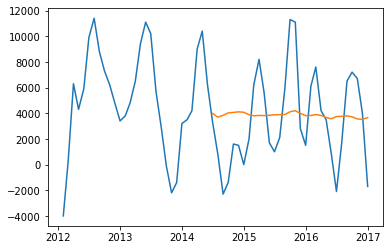

In [24]:
# residuals plotted out with rolling standard deviation of our errors
plt.plot(residuals.index, residuals)
plt.plot(residuals.index, residuals.rolling(30).std())

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


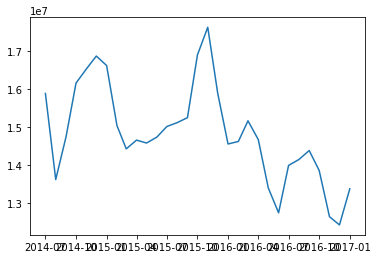

In [25]:
# rolling variance of our errors
plt.plot(residuals.index, residuals.rolling(30).var())

In [26]:
# lets now import ARIMA in order to stationarize our data

from statsmodels.tsa.arima_model import ARIMA

rw = ARIMA(train, (0, 1, 0), freq='MS').fit() # indicating 1st order difference
rw.predict(typ='levels') # levels allows us to predict on original scale

# 1st order essentially being a random walk model

2012-02-01    7.420217e+05
2012-03-01    7.380217e+05
2012-04-01    7.383217e+05
2012-05-01    7.446217e+05
2012-06-01    7.489217e+05
2012-07-01    7.548217e+05
2012-08-01    7.647217e+05
2012-09-01    7.761217e+05
2012-10-01    7.849217e+05
2012-11-01    7.922217e+05
2012-12-01    7.984217e+05
2013-01-01    8.032217e+05
2013-02-01    8.066217e+05
2013-03-01    8.104217e+05
2013-04-01    8.152217e+05
2013-05-01    8.217217e+05
2013-06-01    8.311217e+05
2013-07-01    8.422217e+05
2013-08-01    8.524217e+05
2013-09-01    8.581217e+05
2013-10-01    8.610217e+05
2013-11-01    8.609217e+05
2013-12-01    8.587217e+05
2014-01-01    8.573217e+05
2014-02-01    8.605217e+05
2014-03-01    8.640217e+05
2014-04-01    8.682217e+05
2014-05-01    8.772217e+05
2014-06-01    8.876217e+05
2014-07-01    8.938217e+05
2014-08-01    8.971217e+05
2014-09-01    8.979217e+05
2014-10-01    8.956217e+05
2014-11-01    8.942217e+05
2014-12-01    8.958217e+05
2015-01-01    8.973217e+05
2015-02-01    8.973217e+05
2

In [27]:
random_walk

time
2012-01-01         NaN
2012-02-01    737700.0
2012-03-01    733700.0
2012-04-01    734000.0
2012-05-01    740300.0
                ...   
2016-09-01    974300.0
2016-10-01    980800.0
2016-11-01    988000.0
2016-12-01    994700.0
2017-01-01    998700.0
Name: value, Length: 61, dtype: float64

In [28]:
y_hat = rw.predict(typ='levels') # levels is used to convert differencing performed

np.sqrt(mean_squared_error(train[1:], y_hat)) # RMSE is equivalent to Random Walk RMSE

3854.8277811365606

# Performing Autoregressive Model (AR)

In [29]:
ar_1 = ARIMA(train, (1,1,0), freq='MS').fit()

ar_1.predict(typ='levels')

2012-02-01    7.414887e+05
2012-03-01    7.319709e+05
2012-04-01    7.353172e+05
2012-05-01    7.458678e+05
2012-06-01    7.487509e+05
2012-07-01    7.557844e+05
2012-08-01    7.685181e+05
2012-09-01    7.809808e+05
2012-10-01    7.879389e+05
2012-11-01    7.941762e+05
2012-12-01    7.995969e+05
2013-01-01    8.034051e+05
2013-02-01    8.058133e+05
2013-03-01    8.098967e+05
2013-04-01    8.154051e+05
2013-05-01    8.231095e+05
2013-06-01    8.345639e+05
2013-07-01    8.468683e+05
2013-08-01    8.564307e+05
2013-09-01    8.589427e+05
2013-10-01    8.598591e+05
2013-11-01    8.576338e+05
2013-12-01    8.539461e+05
2014-01-01    8.531129e+05
2014-02-01    8.595716e+05
2014-03-01    8.632842e+05
2014-04-01    8.679801e+05
2014-05-01    8.803805e+05
2014-06-01    8.917724e+05
2014-07-01    8.949969e+05
2014-08-01    8.962425e+05
2014-09-01    8.952714e+05
2014-10-01    8.907753e+05
2014-11-01    8.900129e+05
2014-12-01    8.937382e+05
2015-01-01    8.951673e+05
2015-02-01    8.941047e+05
2

In [30]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   60
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -562.457
Method:                       css-mle   S.D. of innovations           2834.273
Date:                Tue, 10 Nov 2020   AIC                           1130.914
Time:                        19:19:59   BIC                           1137.197
Sample:                    02-01-2012   HQIC                          1133.372
                         - 01-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3788.6955   1229.365      3.082      0.002    1379.185    6198.206
ar.L1.D.value     0.7084      0.098      7.222      0.000       0.516       0.901
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4116           +0.0000j            1.4116            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
rw_model = ARIMA(train, (0,1,0), freq='MS').fit()
rw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   60
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -580.561
Method:                           css   S.D. of innovations           3854.828
Date:                Tue, 10 Nov 2020   AIC                           1165.122
Time:                        19:20:01   BIC                           1169.311
Sample:                    02-01-2012   HQIC                          1166.761
                         - 01-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4321.6667    497.656      8.684      0.000    3346.279    5297.055
==============================================================================
"""

In [32]:
y_hat_ar1 = ar_1.predict(typ='levels')
rmse_ar1 = np.sqrt(mean_squared_error(train[1:], y_hat_ar1))
rmse_ar1

2922.4189370158706

In [33]:
y_hat_rw = rw.predict(typ='levels')
rmse_rw = np.sqrt(mean_squared_error(train[1:], y_hat_rw))

In [34]:
print(rmse_rw)
print(rmse_ar1)

3854.8277811365606
2922.4189370158706


In [35]:
ar_2 = ARIMA(train, (2, 1, 0), freq='MS').fit()

y_hat_ar_2 = ar_2.predict(typ='levels')

In [36]:
ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -549.657
Method:                       css-mle   S.D. of innovations           2271.500
Date:                Tue, 10 Nov 2020   AIC                           1107.315
Time:                        19:20:33   BIC                           1115.692
Sample:                    02-01-2012   HQIC                          1110.592
                         - 01-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4160.0925    611.000      6.809      0.000    2962.555    5357.630
ar.L1.D.value     1.1374      0.109     10.478      0.000       0.925       1.350
ar.L2.D.value    -0.6233      0.107     -5.805      0.000      -0.834      -0.413
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9125           -0.8786j            1.2667           -0.1220
AR.2            0.9125           +0.8786j            1.2667            0.1220
-----------------------------------------------------------------------------
"""

In [37]:
rmse_ar2 = np.sqrt(mean_squared_error(train[1:], y_hat_ar_2))
print(rmse_ar2)

2438.5194142885043


In [38]:
print(rmse_rw)
print(rmse_ar1)
print(rmse_ar2)

3854.8277811365606
2922.4189370158706
2438.5194142885043


# Performing Movering Average Model

In [39]:
ma_1 = ARIMA(train, (0,0,1), freq='MS').fit()
y_hat = ma_1.predict(typ='levels')

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [40]:
ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  value   No. Observations:                   61
Model:                     ARMA(0, 1)   Log Likelihood                -733.446
Method:                       css-mle   S.D. of innovations          38985.375
Date:                Tue, 10 Nov 2020   AIC                           1472.893
Time:                        19:20:42   BIC                           1479.225
Sample:                    01-01-2012   HQIC                          1475.374
                         - 01-01-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.765e+05   9902.332     88.519      0.000    8.57e+05    8.96e+05
ma.L1.value     1.0000      0.041     24.612      0.000       0.920       1.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [41]:
ma_1 = ARIMA(train, (0, 1, 1), freq='MS').fit()
rmse_ma1 = np.sqrt(mean_squared_error(train[1:], ma_1.predict(typ='levels')))

In [42]:
print(rmse_rw)
print(rmse_ar1)
print(rmse_ar2)
print(rmse_ma1)

3854.8277811365606
2922.4189370158706
2438.5194142885043
2577.949300399055


# ACF

In [45]:
df = pd.DataFrame(train)
df.columns = ['lag_0']
df['lag_1'] = train.shift()
df['lag_2'] = train.shift(2)
df['lag_3'] = train.shift(3)
df['lag_4'] = train.shift(4)
df['lag_5'] = train.shift(5)
df.corr()

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5
lag_0,1.000000,0.998702,0.995725,0.992316,0.988972,0.986394
lag_1,0.998702,1.000000,0.998685,0.995560,0.991954,0.988469
lag_2,0.995725,0.998685,1.000000,0.998620,0.995362,0.991670
lag_3,0.992316,0.995560,0.998620,1.000000,0.998568,0.995225
lag_4,0.988972,0.991954,0.995362,0.998568,1.000000,0.998524
lag_5,0.986394,0.988469,0.991670,0.995225,0.998524,1.000000


In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

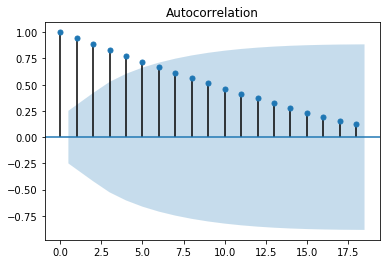

In [47]:
plot_acf(train); #ma, q term

# indicative of there being correlation between lags up until about 5 years

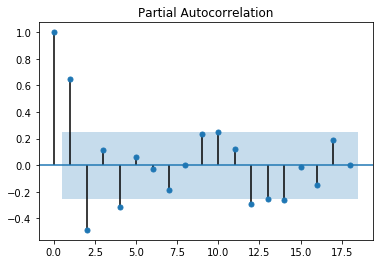

In [48]:
plot_pacf(train.diff().dropna()); #ar, p term

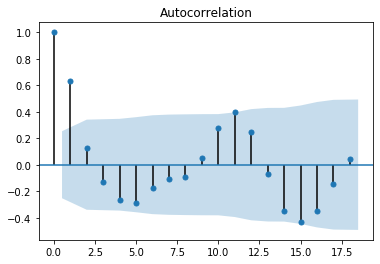

In [49]:
plot_acf(train.diff().dropna());

In [50]:
# rather than trying to find optimal terms by hand, we can use auto_arima
from pmdarima import auto_arima

auto_arima(train, start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1165.122, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1178.457, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1175.410, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1211.970, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1226.890, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.409 seconds


ARIMA(order=(0, 1, 0), scoring_args={})

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


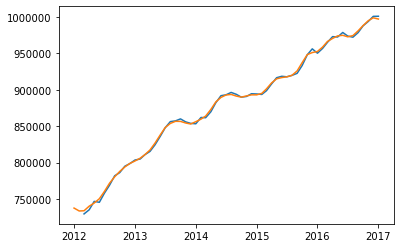

In [139]:
aa_model = ARIMA(train, (1,2,2)).fit()
y_hat_train = aa_model.predict(typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train)
ax.plot(train)

In [140]:
aa_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.value   No. Observations:                   59
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -539.673
Method:                       css-mle   S.D. of innovations           2206.611
Date:                Tue, 10 Nov 2020   AIC                           1089.346
Time:                        20:38:54   BIC                           1099.734
Sample:                    03-01-2012   HQIC                          1093.401
                         - 01-01-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -30.6475     58.870     -0.521      0.603    -146.030      84.735
ar.L1.D2.value     0.5415      0.130      4.166      0.000       0.287       0.796
ma.L1.D2.value    -0.2254      0.090     -2.499      0.012      -0.402      -0.049
ma.L2.D2.value    -0.7746      0.086     -9.036      0.000      -0.943      -0.607
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8467           +0.0000j            1.8467            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2910           +0.0000j            1.2910            0.5000
-----------------------------------------------------------------------------
"""

In [141]:
rmse = np.sqrt(mean_squared_error(train[2:], y_hat_train))
rmse

2315.2096289383658

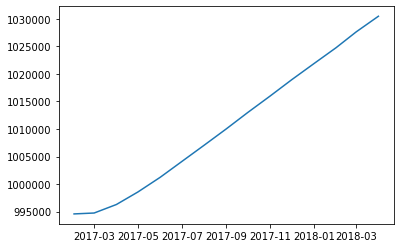

In [69]:
y_hat_test = aa_model.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_test)

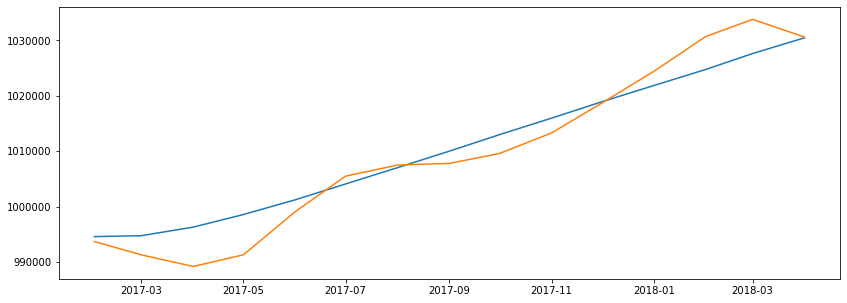

In [75]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(y_hat_test)
ax.plot(test)
#ax.plot(train)

In [71]:
np.sqrt(mean_squared_error(test, y_hat_test))

3883.7936190751852

In [ ]:
# p,d,q = autoregressors, differences, moving average

# Modeling SARIMAX

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
import itertools
p = q = range(0, 2)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

        #12 indicates 1 year

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (1, 1, 0) x (0, 1, 0, 12)
SARIMAX: (1, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 1, 0) x (1, 1, 0, 12)
SARIMAX: (1, 1, 0) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (0, 1, 0, 12)
SARIMAX: (1, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 0, 12)
SARIMAX: (1, 1, 1) x (1, 1, 1, 12)


In [85]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:925.9845496723169


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/s

ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:885.6155991747318
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:706.9786472845656
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:680.5537518133499
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:896.5115795796154


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodel

ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1337.868598375237
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:683.1159093040776


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/s

ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:646.7148869584346
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:899.0037061199196


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/s

ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1317.2715166709538
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:671.1667800738807
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:672.4273436535497
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:880.6970308773513


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodel

ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:923.2391780229461
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:661.8801234688592


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:643.7146902697988


In [102]:
results.aic

643.7146902697988

In [ ]:
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:646.7148869584346

In [86]:
sari_mod =SARIMAX(train,order=(1,1,1),
                  seasonal_order=(1,1,1,12),
                  enforce_stationarity=False,
                  enforce_invertibility=False
                  freq='MS').fit()

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [145]:
y_hat_train

2012-01-01    0.000000e+00
2012-02-01    7.306898e+05
2012-03-01    7.298289e+05
2012-04-01    7.318357e+05
2012-05-01    7.390249e+05
                  ...     
2016-09-01    9.803341e+05
2016-10-01    9.921134e+05
2016-11-01    9.991565e+05
2016-12-01    9.975839e+05
2017-01-01    1.000233e+06
Freq: MS, Length: 61, dtype: float64

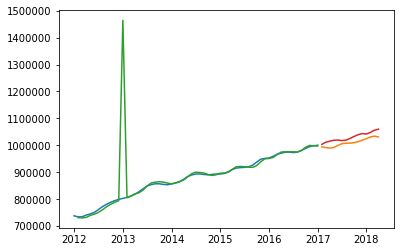

In [182]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_train = y_hat_train.iloc[1:]
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.plot(y_hat_train)
ax.plot(y_hat_test)

In [178]:
y_hat_train.max()

1464499.0126606398

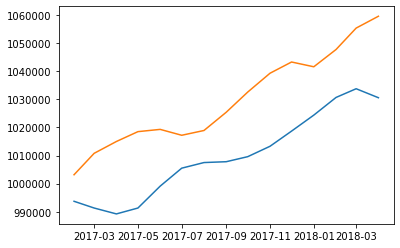

In [89]:
fig, ax = plt.subplots()

ax.plot(test)
ax.plot(y_hat_test)

In [90]:
np.sqrt(mean_squared_error(test, y_hat_test))

20935.899776334318

# Forecasting

In [204]:
sari_mod =SARIMAX(train,order=(1,1,1),
                  seasonal_order=(1,1,1,12),
                  enforce_stationarity=False,
                  enforce_invertibility=False,
                  freq='MS').fit()

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [223]:
forecast = sari_mod.forecast(steps = 24)
forecast

2017-02-01    9.970283e+05
2017-03-01    1.002169e+06
2017-04-01    1.005327e+06
2017-05-01    1.008397e+06
2017-06-01    1.009020e+06
2017-07-01    1.006821e+06
2017-08-01    1.008491e+06
2017-09-01    1.014991e+06
2017-10-01    1.022158e+06
2017-11-01    1.028821e+06
2017-12-01    1.032834e+06
2018-01-01    1.031103e+06
2018-02-01    1.031076e+06
2018-03-01    1.036194e+06
2018-04-01    1.039339e+06
2018-05-01    1.042402e+06
2018-06-01    1.043022e+06
2018-07-01    1.040819e+06
2018-08-01    1.042489e+06
2018-09-01    1.048990e+06
2018-10-01    1.056154e+06
2018-11-01    1.062814e+06
2018-12-01    1.066828e+06
2019-01-01    1.065094e+06
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Home Sale Predictions')

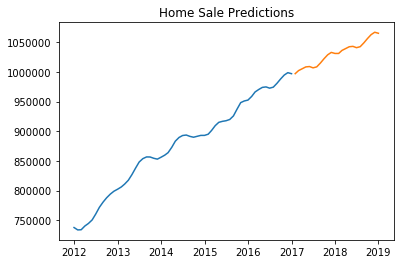

In [222]:
fig, ax = plt.subplots()

ax.plot(train)
ax.plot(forecast)
ax.set_title('Home Sale Predictions')